### Tensorflow

In this worksheet we will build some neural network models using Keras and Tensorflow.

Tensorflow is a library that supports the creation of complex architectures for neural nets.

It also has built-in support for regularization, scaling, and initialization of neural nets.

It can automate backpropagation, and has a varied selection of activation functions, loss functions, and optimization methods.

Tensorflow is quite complex, both to use and to install.

Rather than using Tensorflow directly, we will use a front-end called Keras. 

Keras can support many back-ends, not just Tensorflow.

Below we use the version of `keras` that is a submodule of `tensorflow`, ensuring that Tensorflow is the back end ML system.

All the code for these notes is copied from Chapter 10 of *Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow* by Aurélien Géron.

https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb

A quick way to get access to a working TensorFlow installation is to use Colab.


In [65]:
import tensorflow as tf
from tensorflow import keras

In [66]:
tf.__version__

'2.9.2'

In [67]:
keras.__version__


'2.9.0'

### Fashion MNIST

The dataset we use to illustrate classification is called *fashion MNIST*.

Recall that in the original MNIST we worked with `28x28` matrixes of pixels, each one with a value between 0 and 255 (greyscale intensity), representing images of handwritten digits.

Now, in fashion MNIST, the images are of clothing items.

There are 10 possible clothing items.

This dataset is more challenging than the handwritten digit version.

Good linear classifiers have $\approx$ 83% accuracy on fashion MNIST, compared with 91% accuracy on MNIST.



In [68]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)= fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

### Validation set

We set aside a validation set.

The purpose is to check overfitting as tensorflow fits the model through a number of epochs. 

In [ ]:
X_valid,X_train = X_train_full[:5000]/255.0,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]



Trouser


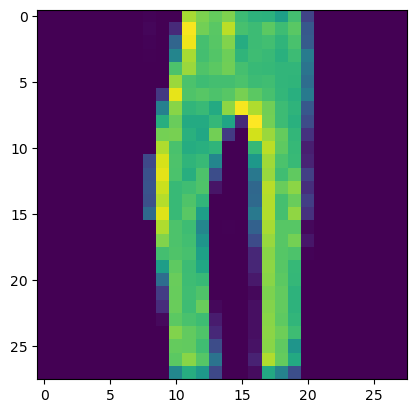

In [ ]:
i=3500
img = X_train[i]
import matplotlib.pyplot as plt

plt.imshow(img)
print(class_names[y_train[i]])
plt.show()

![fminst](fminst.png)

### First model

Below we make our first model.

The input comes in `28x28` matrixes which are flattened in the first layer.

We then have 2 hidden layers, densely connected, with 300 and 100 neurons, respectively (not counting bias nodes). 

The activation function in the hidden layers is `relu`. 

In the output layer we apply the `softmax` transformation.

This converts the relative output strengths of the 10 output nodes to a probability distribution.

https://en.wikipedia.org/wiki/Softmax_function

The fact that the model is "Sequential" means that the layers sequentially form the network in the way we are used to.

In more complex models the layers can connect in exotic ways (jumping the subsequent layer, for example).

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

In [ ]:
weights,biases = hidden1.get_weights()
weights

array([[-0.02800443,  0.04855824,  0.02751914, ...,  0.00960008,
        -0.00796123, -0.0133522 ],
       [ 0.01611954,  0.00144831, -0.02820668, ...,  0.00065094,
         0.01651683,  0.04379861],
       [-0.0437861 ,  0.00658993, -0.05881778, ..., -0.04739716,
        -0.03433928,  0.03154709],
       ...,
       [-0.00350509,  0.04625763,  0.02062563, ...,  0.03252264,
        -0.00028712, -0.05172993],
       [ 0.04167175,  0.01196171,  0.00652634, ..., -0.07023708,
         0.03556088,  0.0264007 ],
       [ 0.01406019, -0.02540822, -0.0418445 , ..., -0.06002566,
        -0.03875675, -0.05263955]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Compiling the model

Below we "compile" the model.

This sets the loss function, the optimization algorithm, and the output metrics.

Below we use "sparse categorical crossentropy" as out loss function.

"Crossentropy" is a generalization of the loss function we used for logistic regression to more than 2 classes. 

This basically measures how close the output probability distribution (from softmax) comes to the true conditional probability $P(y | x)$. 

This loss will form the basis for $\delta^L$, the final sensitivity vector.  

Its influence will be pushed back through the network using backpropagation during training.


The `sparse` part means that `y` values look like `2` rather than `[0,0,1,0,0,0,0,0,0,0]`.



In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

### Fitting the model

We now fit the model.

The validation set is optional and is used only for output in this case.

Validation data can be used to fit hyperparameters, but we don't consider any hyperparameters here.

As the training goes through epochs, notice that

1) The loss trends downwards
2) The accuracy trends upwards
3) The validation loss and training loss are correlated but slightly different.


In [ ]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
  11/1719 [..............................] - ETA: 18s - loss: 2.3055 - accuracy: 0.1591

2022-12-12 14:34:19.650433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1715/1719 [============================>.] - ETA: 0s - loss: 0.7260 - accuracy: 0.7614

2022-12-12 14:34:30.121311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 11s 6ms/step - loss: 0.7253 - accuracy: 0.7616 - val_loss: 0.5080 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4879 - accuracy: 0.8296 - val_loss: 0.4336 - val_accuracy: 0.8550
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4416 - accuracy: 0.8441 - val_loss: 0.4229 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4146 - accuracy: 0.8545 - val_loss: 0.4092 - val_accuracy: 0.8608
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3928 - accuracy: 0.8628 - val_loss: 0.3875 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3772 - accuracy: 0.8683 - val_loss: 0.3711 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3634 - accuracy: 0.8731 - val_loss: 0.3664 - val_accuracy: 0.8

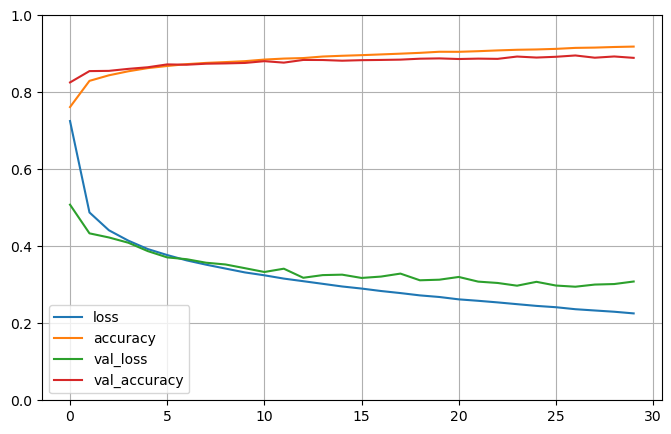

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1 )
plt.show()

In [ ]:
model.evaluate(X_test,y_test)


 22/313 [=>............................] - ETA: 1s - loss: 49.0732 - accuracy: 0.8594

2022-12-12 14:39:36.033038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 63.7754 - accuracy: 0.8447


[63.775447845458984, 0.844700038433075]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 37ms/step


2022-12-12 14:39:37.647000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
np.array(class_names)[y_test[:3]]

### Regression

Above we saw how to use TensorFlow to solve a classification problem.

The book (see above) uses the California Housing dataset for this purpose.

I decided to use a tough regression dataset that Jian is using for Project 2.

No sklearn models can get a very high R2 score on this problem.

Can TensorFlow do better?  

Let's see.

First we load the data and scale it.



In [ ]:
df =pd.read_csv("OnlineNewsPopularity.csv")
df.sample(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
5849,http://mashable.com/2013/04/24/kickstarter-res...,624.0,9.0,1119.0,0.433092,1.0,0.655738,20.0,5.0,8.0,...,0.033333,1.00,-0.273810,-1.0000,-0.1000,0.000000,0.00,0.500000,0.00,1600
14970,http://mashable.com/2013/10/22/nokia-lumia-1520/,443.0,12.0,606.0,0.504318,1.0,0.702703,9.0,7.0,1.0,...,0.136364,0.80,-0.198214,-0.5000,-0.0500,0.333333,0.25,0.166667,0.25,1800
8498,http://mashable.com/2013/06/17/batman-arkham-o...,570.0,11.0,509.0,0.510121,1.0,0.620061,17.0,9.0,6.0,...,0.100000,1.00,-0.187500,-0.1875,-0.1875,0.000000,0.00,0.500000,0.00,847
25822,http://mashable.com/2014/05/26/apple-smart-hom...,227.0,10.0,517.0,0.487448,1.0,0.599388,1.0,1.0,10.0,...,0.100000,0.85,-0.200000,-0.2500,-0.1000,0.000000,0.00,0.500000,0.00,1500
23321,http://mashable.com/2014/04/10/linkedin-intern...,273.0,9.0,1117.0,0.451072,1.0,0.621118,11.0,5.0,6.0,...,0.062500,1.00,-0.271429,-0.5000,-0.1000,1.000000,0.00,0.500000,0.00,2300


In [ ]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
df = df.drop(columns=['url',' timedelta'],axis=1)  # not a factor for final share number

In [ ]:
# def X and y
import numpy as np
X = df.iloc[:,:-1]
y = df[" shares"]

y = np.log(y)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y)
#X = scaler.fit_transform(X)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,X_test.shape

((29733, 58), (9911, 58))

In [ ]:
X_train

array([[-0.6586575 , -1.00045867,  0.04473786, ...,  0.2443954 ,
        -1.80976538, -0.08633729],
       [ 0.75724818, -0.53310938,  0.01529469, ...,  0.48410183,
        -0.22118184,  0.19468419],
       [ 0.75724818, -0.37591008,  0.00392472, ..., -1.77598738,
        -1.28023753,  1.07789453],
       ...,
       [ 1.22921674, -0.422645  ,  0.0156142 , ..., -0.26926124,
         0.83787386, -0.68852616],
       [ 0.28527962, -0.19109468, -0.01335272, ..., -0.26926124,
         0.83787386, -0.68852616],
       [ 0.75724818,  0.78184156, -0.02231411, ..., -0.14370073,
         0.4848553 , -0.54132444]])

### Designing the network

There are a few new things to consider with regression.

First, the input layer is already 1D -- we do not need to flatten it.

Second, the output layer does not need an activation function (since this is regression).

Third, we change the loss function to MSE.

It would be nice to add R2 score as a metric, but for some reason this is not easy to do in Keras.

Observe that rather than explicitly setting aside a validation set, this time we do

`validation_split=0.1`

This tells the model to use the final 10% of the training data for validation (before shuffling).

In [70]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1)])
    
model.compile(loss="mean_squared_error")

history= model.fit(X_train,y_train,epochs=8,validation_split=0.1)

Epoch 1/8
  8/837 [..............................] - ETA: 6s - loss: 44.8681  

2022-12-12 14:55:39.931391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - ETA: 0s - loss: 3.8470

2022-12-12 14:55:45.076095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - 6s 6ms/step - loss: 3.8470 - val_loss: 0.9424
Epoch 2/8
837/837 [==============================] - 5s 7ms/step - loss: 1.1476 - val_loss: 0.8291
Epoch 3/8
837/837 [==============================] - 5s 6ms/step - loss: 1.0024 - val_loss: 0.8081
Epoch 4/8
837/837 [==============================] - 5s 6ms/step - loss: 0.9100 - val_loss: 0.8088
Epoch 5/8
837/837 [==============================] - 5s 6ms/step - loss: 0.8294 - val_loss: 0.7975
Epoch 6/8
837/837 [==============================] - 5s 6ms/step - loss: 0.7615 - val_loss: 0.7815
Epoch 7/8
837/837 [==============================] - 5s 6ms/step - loss: 0.7420 - val_loss: 0.7794
Epoch 8/8
837/837 [==============================] - 5s 6ms/step - loss: 0.7456 - val_loss: 0.8006


In [73]:
yhat = model.predict(X_test)
yhat

 84/310 [=======>......................] - ETA: 0s

2022-12-12 14:57:43.324314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 1s 2ms/step


array([[7.2969565],
       [6.8704176],
       [7.3340206],
       ...,
       [7.7515097],
       [8.1663475],
       [7.584839 ]], dtype=float32)

### Performance of first attempt

The R2 score we got was only about .11.  

That is not good in an absolute sense, but it is about what the `sklearn` models were getting.


In [75]:
from sklearn.metrics import r2_score

r2_score(y_test,yhat)

0.10908181761552915

### Try harder?

We will try a more complex model and more epochs.

If this doesn't work then we will give up for now.


In [86]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1]),
    keras.layers.Dense(200,activation='tanh'),
    keras.layers.Dense(200,activation='tanh'),
    keras.layers.Dense(1)])
    
model.compile(loss="mean_squared_error")

history= model.fit(X_train,y_train,epochs=40,validation_split=0.1)

Epoch 1/40


2022-12-12 15:16:19.296822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - ETA: 0s - loss: 3.4499

2022-12-12 15:16:25.457379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - 7s 7ms/step - loss: 3.4499 - val_loss: 1.0277
Epoch 2/40
837/837 [==============================] - 6s 7ms/step - loss: 0.8186 - val_loss: 0.8243
Epoch 3/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7663 - val_loss: 0.8353
Epoch 4/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7483 - val_loss: 0.7842
Epoch 5/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7389 - val_loss: 0.7678
Epoch 6/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7260 - val_loss: 0.8557
Epoch 7/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7158 - val_loss: 0.8323
Epoch 8/40
837/837 [==============================] - 6s 7ms/step - loss: 0.7069 - val_loss: 0.8200
Epoch 9/40
837/837 [==============================] - 6s 7ms/step - loss: 0.6949 - val_loss: 0.7817
Epoch 10/40
837/837 [==============================] - 6s 7ms/step - loss: 0.6827 - val_loss: 0.8110
Epoch 11/4

In [87]:
yhat = model.predict(X_test)
r2_score(y_test,yhat)

 85/310 [=======>......................] - ETA: 0s

2022-12-12 15:20:53.168049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 1s 2ms/step


-0.2719203507763035

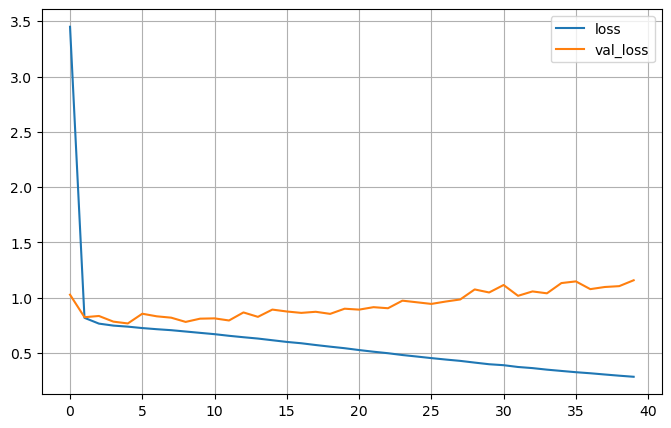

In [88]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

## Massive overfitting!

Above we see that we overfit the data considerably.

Maybe we can add regularization to improve things?

How do you even do that?



In [89]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1]),
    keras.layers.Dense(200,activation='tanh',kernel_regularizer=keras.regularizers.l2(10)),
    keras.layers.Dense(200,activation='tanh',kernel_regularizer=keras.regularizers.l2(10)),
    keras.layers.Dense(1,kernel_regularizer=keras.regularizers.l2(10))])
    
model.compile(loss="mean_squared_error")

history= model.fit(X_train,y_train,epochs=40,validation_split=0.1)

Epoch 1/40


2022-12-12 15:24:11.582777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - ETA: 0s - loss: 118.1718

2022-12-12 15:24:18.514727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - 8s 8ms/step - loss: 118.1718 - val_loss: 5.5857
Epoch 2/40
837/837 [==============================] - 7s 8ms/step - loss: 4.1026 - val_loss: 3.1130
Epoch 3/40
837/837 [==============================] - 7s 8ms/step - loss: 2.7801 - val_loss: 2.4699
Epoch 4/40
837/837 [==============================] - 7s 8ms/step - loss: 2.2793 - val_loss: 2.1448
Epoch 5/40
837/837 [==============================] - 7s 8ms/step - loss: 1.9721 - val_loss: 2.0212
Epoch 6/40
837/837 [==============================] - 7s 8ms/step - loss: 1.7419 - val_loss: 1.6488
Epoch 7/40
837/837 [==============================] - 7s 8ms/step - loss: 1.5597 - val_loss: 1.4904
Epoch 8/40
837/837 [==============================] - 7s 8ms/step - loss: 1.4199 - val_loss: 1.4282
Epoch 9/40
837/837 [==============================] - 7s 8ms/step - loss: 1.3084 - val_loss: 1.3175
Epoch 10/40
837/837 [==============================] - 7s 8ms/step - loss: 1.2336 - val_loss: 1.2234
Epoch 11

In [90]:
yhat = model.predict(X_test)
r2_score(y_test,yhat)

 82/310 [======>.......................] - ETA: 0s

2022-12-12 15:28:42.676927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 1s 2ms/step


-0.07518371339205254

### Thoughts

We retained the powerful model but fixed the overfitting problem.

However performance is still bad.

Let's try one more technique: Dropout

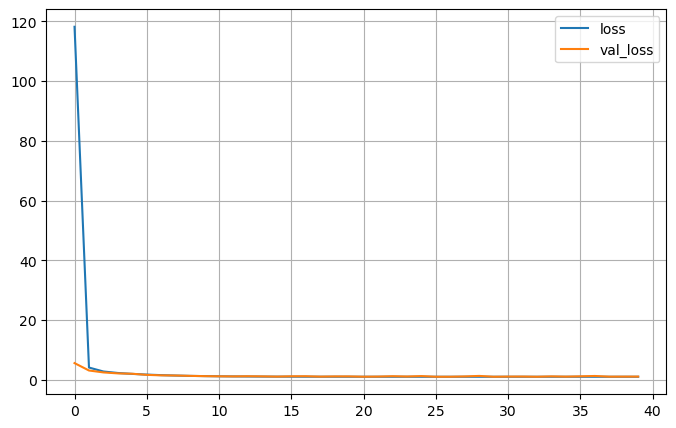

In [91]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

In [92]:
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1]),
    keras.layers.Dropout(rate=0.2,),
    keras.layers.Dense(200,activation='tanh',kernel_regularizer=keras.regularizers.l2(10)),
    keras.layers.Dropout(rate=0.2,),
    keras.layers.Dense(200,activation='tanh',kernel_regularizer=keras.regularizers.l2(10)),
    keras.layers.Dropout(rate=0.2,),
    keras.layers.Dense(1,kernel_regularizer=keras.regularizers.l2(10))])
    
model.compile(loss="mean_squared_error")

history= model.fit(X_train,y_train,epochs=40,validation_split=0.1)

Epoch 1/40


2022-12-12 15:28:43.643948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - ETA: 0s - loss: 118.1609

2022-12-12 15:28:51.183701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - 8s 9ms/step - loss: 118.1609 - val_loss: 6.3767
Epoch 2/40
837/837 [==============================] - 7s 9ms/step - loss: 4.0836 - val_loss: 3.1970
Epoch 3/40
837/837 [==============================] - 7s 9ms/step - loss: 2.7771 - val_loss: 2.5481
Epoch 4/40
837/837 [==============================] - 7s 9ms/step - loss: 2.2812 - val_loss: 2.1664
Epoch 5/40
837/837 [==============================] - 7s 9ms/step - loss: 1.9723 - val_loss: 1.8667
Epoch 6/40
837/837 [==============================] - 7s 9ms/step - loss: 1.7419 - val_loss: 1.8260
Epoch 7/40
837/837 [==============================] - 7s 9ms/step - loss: 1.5615 - val_loss: 1.5192
Epoch 8/40
837/837 [==============================] - 7s 9ms/step - loss: 1.4160 - val_loss: 1.3695
Epoch 9/40
837/837 [==============================] - 7s 9ms/step - loss: 1.3076 - val_loss: 1.2890
Epoch 10/40
837/837 [==============================] - 7s 9ms/step - loss: 1.2303 - val_loss: 1.2743
Epoch 11

In [93]:
yhat = model.predict(X_test)
r2_score(y_test,yhat)

 75/310 [======>.......................] - ETA: 0s

2022-12-12 15:42:26.535482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


310/310 [==============================] - 1s 2ms/step


-0.09173350999043883

### Dropout results

Dropout does a great job of fixing overfitting, but the model is still not able to learn this data.

C'est la vie.

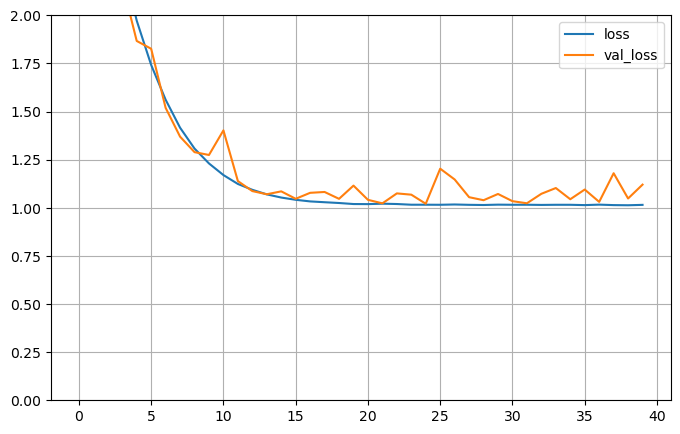

In [95]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

### More complex models

We will now explore TensorFlow's ability to train nets with exotic architectures.

First we will try a "wide and deep" model.



In [117]:

input_ = keras.layers.Input(shape=X_train.shape[1])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [118]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 58)]         0           []                               
                                                                                                  
 dense_42 (Dense)               (None, 30)           1770        ['input_17[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 30)           930         ['dense_42[0][0]']               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 88)           0           ['input_17[0][0]',               
                                                                  'dense_43[0][0]']         

In [120]:
model.compile(loss="mean_squared_error")
history = model.fit(X_train, y_train, epochs=20,
                    validation_split=0.1)
#y_pred = model.predict(X_test)


Epoch 1/20


2022-12-12 15:59:20.936315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


835/837 [============================>.] - ETA: 0s - loss: nan

2022-12-12 15:59:26.978541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


837/837 [==============================] - 7s 7ms/step - loss: nan - val_loss: nan
Epoch 2/20
527/837 [=================>............] - ETA: 2s - loss: nan

KeyboardInterrupt: 

In [105]:
X_train.shape

(29733, 58)